<a href="https://colab.research.google.com/github/AnishPawar/DSC-Eye-of-God/blob/flaskLatencyFix/Stage-2/Cloud_Backend/Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend'

/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend


In [ ]:
!pip install flask-ngrok

In [ ]:
from tensorflow import keras
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, display_images
from my_utils import load_cv
from  load_model import load_model_depth
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '10'
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def isClose(x,y,w,h,img):
  height, width = img.shape[:2]
  initThresh = 1000000
  ul = (x, y)
  lr = (x+w, y+h)

  if int(x+w/2) in range(0, int(width/4)):
      impart = 1
  elif int(x+w/2) in range(int(width/4), 2*int(width/4)):
      impart = 2
  elif int(x+w/2) in range(2*int(width/4), 3*int(width/4)):
      impart =3 
  elif int(x+w/2) in range(3*int(width/4), 4*int(width/4)):
      impart = 4 

  roi = img[ul[0]:lr[0], ul[1]:lr[1]]
  histogram = roi.ravel()

  if np.mean(histogram) < initThresh:
      fclass = cls
      initThresh = np.mean(histogram)
      fimpart = impart

  if initThresh <= 120:
    #dodgethis = cv2.bitwise_not(dodgeno)
    print("initThresh is alive")
    mappedOutput = 0.02*initThresh**2 - 3.55*initThresh + 300

    whatToPush['testing.png'] = [fimpart, int(mappedOutput), fclass]
    with open("test_json_files/push.json", "w") as outfile: 
        json.dump(whatToPush, outfile)

In [ ]:
from  load_model import load_model_depth
depthModel = load_model_depth()

Loading model...

Model loaded (nyu.h5).


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js

In [ ]:
from utils import predict, display_images

def depthMap(depthModel,img):
  outputs = predict(depthModel, img)
  print("Visualising")
  viz = display_images(outputs.copy(), img.copy())
  viz = np.flip(viz,0)
  cv2.imwrite("/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend/test_json_files/gg.jpg",viz)
  cv2_imshow(viz)
  return viz

In [ ]:
def dataExtractor(request):
  allx = str(request.form['x'])
  ally = str(request.form['y'])
  allw = str(request.form['w'])
  allh = str(request.form['h'])
  allclasses = str(request.form['dClass'])

  allclasses = allclasses.split(',')
  allclasses.pop()
  allx = allx.split(',')
  allx.pop()
  ally = ally.split(',')
  ally.pop()
  allw = allw.split(',')
  allw.pop()
  allh = allh.split(',')
  allh.pop()

  mpClasses = [
  "bicycle",
  "car",
  "motorcycle",
  "airplane",
  "bus",
  "train",
  "person",
  "truck",
  "boat",
  "traffic light",
  "stop sign",
  "bench",
  "potted plant"
  ]
  i = 0
  templist = []
  for object1 in allclasses:
      if object1 in mpClasses:
          templist.append({object1:[allx[i],ally[i],allw[i],allh[i]]})
          print(object1)
          i+=1
  return templist

In [ ]:
import time
from flask import Flask,request,jsonify
import cv2
from numpy.core.fromnumeric import argmax
from werkzeug.datastructures import ImmutableMultiDict
import numpy as np
# from test_img import detect
import os
import io
import base64
import PIL.Image as Image

from PIL import ImageFile
import json
from io import BytesIO

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://956a84c88371.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
Visualising


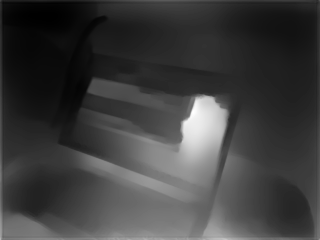

127.0.0.1 - - [31/May/2021 21:03:07] "POST / HTTP/1.1" 200 -


Visualising


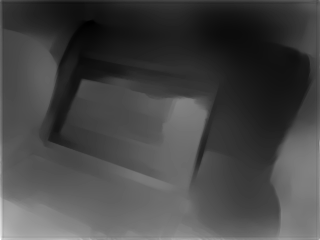

127.0.0.1 - - [31/May/2021 21:03:07] "POST / HTTP/1.1" 200 -


Visualising


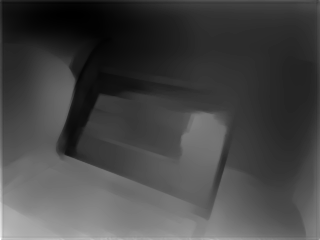

127.0.0.1 - - [31/May/2021 21:03:07] "POST / HTTP/1.1" 200 -


Visualising


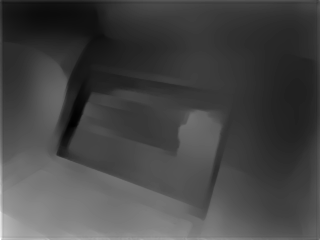

127.0.0.1 - - [31/May/2021 21:03:07] "POST / HTTP/1.1" 200 -


Visualising


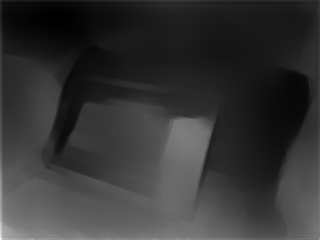

127.0.0.1 - - [31/May/2021 21:03:08] "POST / HTTP/1.1" 200 -


Visualising


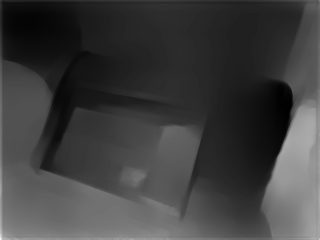

127.0.0.1 - - [31/May/2021 21:03:12] "POST / HTTP/1.1" 200 -


Visualising


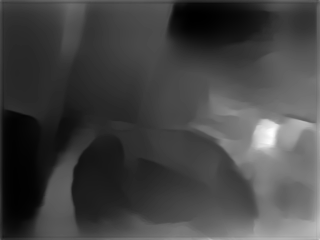

127.0.0.1 - - [31/May/2021 21:03:16] "POST / HTTP/1.1" 200 -


Visualising


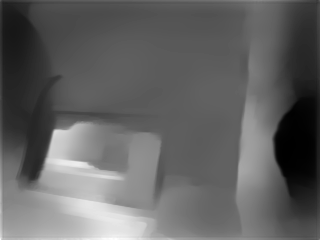

127.0.0.1 - - [31/May/2021 21:03:20] "POST / HTTP/1.1" 200 -


Visualising


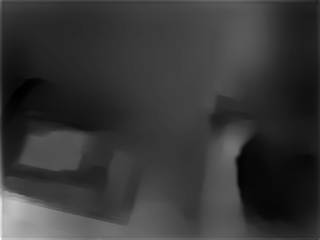

127.0.0.1 - - [31/May/2021 21:03:24] "POST / HTTP/1.1" 200 -


Visualising


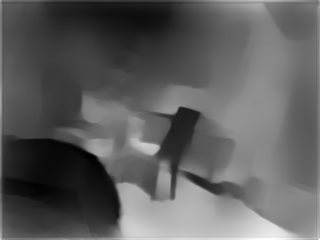

127.0.0.1 - - [31/May/2021 21:03:27] "POST / HTTP/1.1" 200 -


Visualising


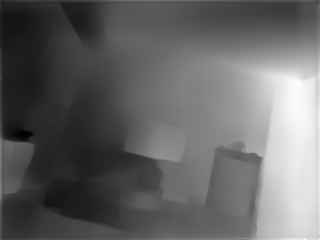

127.0.0.1 - - [31/May/2021 21:03:31] "POST / HTTP/1.1" 200 -


Visualising


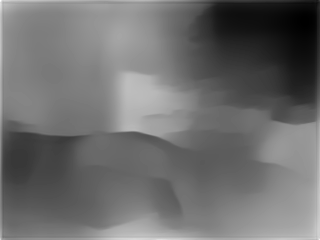

127.0.0.1 - - [31/May/2021 21:03:35] "POST / HTTP/1.1" 200 -


Visualising


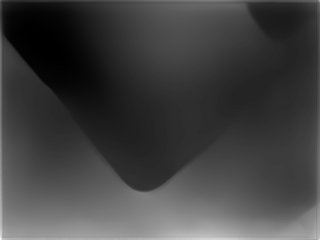

127.0.0.1 - - [31/May/2021 21:03:39] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2021 21:55:39] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [31/May/2021 21:56:14] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [31/May/2021 21:56:15] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:

from flask_ngrok import run_with_ngrok
from flask import Flask,request,jsonify
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/',methods=['POST'])

def outdoorBack():
    data = request.form
    im = Image.open(BytesIO(base64.b64decode(data['Counter'])))

    im.save("received_images/testing.png")
    
    # receivedImage = cv2.imread("received_images/testing.png")
    # print(receivedImage)
    receivedImage = load_cv("received_images/testing.png")
    depthImage = depthMap(depthModel,receivedImage)

    imgData = dataExtractor(request)

    for element in imgData:
      cls = list(element.keys())[0]
      x = int(float(element.get(cls)[0]))
      y = int(float(element.get(cls)[1]))
      w = int(float(element.get(cls)[2]))
      h = int(float(element.get(cls)[3]))

      isClose(x, y, w, h, depthImage)

    if 'push.json' in os.listdir("test_json_files"):
        with open("test_json_files/push.json") as outfile: 
            obj = json.load(outfile)
        fin = list(obj.values())
      
        return_string = '{}:{}:{}'.format(fin[0],fin[1],fin[2])
        print(return_string)
        os.remove("test_json_files/push.json")
        return return_string
    
    return "OK"

app.run()

In [ ]:
# receivedImage = cv2.imread("received_images/testing.png")
inputs = load_cv("received_images/testing.png")
depthImage = depthMap(depthModel,inputs)

Visualising
